In [1]:
import pandas as pd, matplotlib.pyplot as plt, nltk, re
from nltk.stem import WordNetLemmatizer
import functions

In [2]:
def preprocess(text, verbose=True):
    preprocessed = []
    repeat = 0
    lemmatizer = WordNetLemmatizer()
    for i, tweet in enumerate(text):
        if verbose:
            print("Samples: {:,}/{:,}".format(i+1, len(text)), end="\r", flush=True)
        tmp = tweet.lower()
        tmp = re.sub("[0-9]{1,2}/[0-9]{1,2}/([0-9]{4}|[0-9]{2})|([0-9]{4}|[0-9]{2})/[0-9]{1,2}/[0-9]{1,2}|[0-9]{2}/[0-9]{2}", "DATE", tmp)
        tmp = re.sub("[0-9]{2}(:[0-9]{2}){1,2}( ?(am|pm|p\.m\.|a\.m\.))?", "TIME", tmp)
        tmp = re.sub("[0-9]+", " nb ", tmp)
        tmp = tmp.encode(encoding='ascii', errors='ignore').decode()
        # get rid of the non ascii characters
        tmp = re.sub("\.{2,}", "...", tmp)
        for c in ['!', '-', ',']:
            tmp = re.sub("{}+".format(c), c, tmp)
        tmp = re.sub("\?+", "?", tmp)
        tmp = re.sub("`+", "'", tmp)
        tmp = re.sub("'{2,}", "'", tmp)
        tmp = tmp.translate(str.maketrans(dict.fromkeys('#*+/<=>@[\\]^_`{|}~'))) #removing all the other special characters
        tokens = [t if t not in ["''", "``"] else '"' for t in nltk.tokenize.word_tokenize(tmp) ]
        # tokenizing using nltk.word_tokenize. althought it transforms '"' into '``' or "''" and this is a behaviour do not want
        # so we make sure that the '"' are changed to their original form
        for i, token in enumerate(tokens):
            if re.search(r"([a-z])\1{2,}", token):
                repeat += 1
                # cleaning the words containing a letter repeated 3 times or more, using the list of the Ensglish words
                tokens[i] = functions.clean(token)
            tokens[i] = lemmatizer.lemmatize(tokens[i])
        preprocessed.append(tokens)
    if verbose:
        print("{} words with repetitions cleaned".format(repeat))
    return preprocessed

In [2]:
data = pd.read_csv("data/train_posts.csv", header=None)

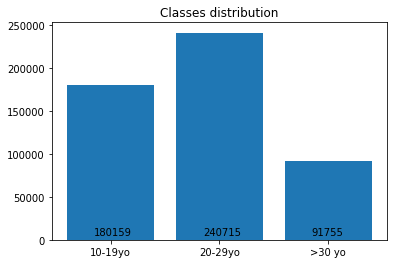

In [4]:
labels = [0,1,2]
n_samples = []
for label in labels:
    n_samples.append(len(data.loc[data[1]==label]))
plt.bar(labels, n_samples)
plt.xticks(labels, ["10-19yo", "20-29yo", ">30 yo"])
plt.title("Classes distribution")
for x,y in zip(labels, n_samples):
    plt.text(x-0.15,5e3,y)

In [5]:
preprocessed = preprocess(data[0].values)

113036 words with repetitions cleaned


In [34]:
new_df = pd.DataFrame({"text" : preprocessed, "label":data[1].values})

In [6]:
preprocessed = []
fp = open("preprocessed.txt")
line = fp.readline()
fp2 = open("preprocessed.csv", "w")
i = 0
size = len(data)
fp2.write("label\tpost\n")
while line:
    fp2.write("{}\t{}\n".format(data[1].values[i],line.split(' ')))
    print("{}/{}".format(i,size), end='\r', flush=True)
    i+=1
fp.close()
fp2.close()

510629/5126295349/512629101552/512629102391/512629116774/512629143926/512629180300/512629265302/512629267820/512629288923/512629331510/512629352527/512629454985/512629466924/512629467599/512629488189/512629501953/512629

In [7]:
pd.read_csv("preprocessed.csv", delimiter='\t')

,label,post
0,0.0,"['long', 'time', '...', 'i', 'have', 'been', '..."
1,0.0,"['long', 'time', '...', 'i', 'have', 'been', '..."
2,0.0,"['long', 'time', '...', 'i', 'have', 'been', '..."
3,0.0,"['long', 'time', '...', 'i', 'have', 'been', '..."
4,0.0,"['long', 'time', '...', 'i', 'have', 'been', '..."
5,0.0,"['long', 'time', '...', 'i', 'have', 'been', '..."
6,0.0,"['long', 'time', '...', 'i', 'have', 'been', '..."
7,0.0,"['long', 'time', '...', 'i', 'have', 'been', '..."
8,0.0,"['long', 'time', '...', 'i', 'have', 'been', '..."
9,0.0,"['long', 'time', '...', 'i', 'have', 'been', '..."
